In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.to_numpy()
y = X[:,-1]
X = X[:, :-1]

In [4]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
X.shape[1]

8

In [6]:
# Normalize X
X_normalized = (X - X.mean()) / X.std()

#X_normalized

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 70)

In [8]:
# We will use the Sigmoid Activation Function throughout the neural network

def sigmoid(z):
    return  1 / (1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(z):
    return z * (1 - z)

# Initialize weights and biases
def initialize(input_size, hidden_layer_size, output_size):
    network = {}
  #our neural network will have an input layer, 1 hidden layer, and an output layer
  #here we initialize the weights and bias at the input layer and hidden layer with a specific shape of random values
    network["W1"] = np.random.randn(input_size, hidden_layer_size)   #W1 represents the matrix containing all the weights for my neurons in the input layer
    network["b1"] = np.random.randn(hidden_layer_size)   #b1 represents a vector containing 5 biases (since there are 5 neurons in the hidden layer)
    network["W2"] = np.random.randn(hidden_layer_size, output_size)   #W2 represents the matrix containing all the weights for my neurons in the hidden layer
    network["b2"] = np.random.randn(output_size)    #b2 represents a vector containing one bias (since there is one neuron in the output layer)
    return network

# Forward propagation
def forward_prop(network, X):
    z1 = np.dot(X, network["W1"]) + network["b1"]
    output_to_layer1 = sigmoid(z1)   #output that gets sent from input layer to hidden layer
    z2 = np.dot(output_to_layer1, network["W2"]) + network["b2"]
    final_output = sigmoid(z2)  #output that gets sent from hidden layer to output layer
    return output_to_layer1, final_output

# Backward propagation
def backward_prop(network, X, y, output_to_layer1, final_output, learning_rate):

    # Calculate the error for the output layer
    error = y - final_output

    # Calculate the gradient for the weights and biases of the output layer
    dW2 = (1 / X.shape[0]) * np.dot(output_to_layer1.T, error)
    db2 = (1 / X.shape[0]) * np.sum(error, axis=0)

    # Calculate the error for the hidden layer (this is the derivative of the cost function with respect to input in the output layer). The input in outer layer is the output of the hidden layer!
    error_hidden = np.dot(error, network["W2"].T) * sigmoid_derivative(output_to_layer1)

    # Calculate the gradient for the weights and biases of the hidden layer
    dW1 = (1 / X.shape[0]) * np.dot(X.T, error_hidden)
    db1 = (1 / X.shape[0]) * np.sum(error_hidden, axis=0)

    # Update the weights and biases
    network["W1"] += learning_rate * dW1
    network["b1"] += learning_rate * db1
    network["W2"] += learning_rate * dW2
    network["b2"] += learning_rate * db2

    return network

# Function that calculates metrics
def calculate_metrics(y_actual, y_predicted):
    accuracy = accuracy_score(y_actual, y_predicted)
    precision = np.sum((y_actual == 1) & (y_predicted == 1)) / np.sum(y_predicted == 1)
    recall = np.sum((y_actual == 1) & (y_predicted == 1)) / np.sum(y_actual == 1)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

In [9]:
# Set learning rate and number of iterations we want to run
learning_rate = 0.005
iterations = 70000

# Initialize weights and biases randomly using the random library
network = initialize(X_train.shape[1], 5, 1)   #I want 5 neurons in the hidden layer and 1 neuron in the output layer. (The initial layer has the same number of neurons as features in X)

# We will store the cost and accuracy for each iteration
NN_errors = []
NN_accuracy = []

# Train the neural network on your fixed iterations and fixed learning rate
for i in range(iterations):
    output_to_layer1, final_output = forward_prop(network, X_train)
    network = backward_prop(network, X_train, y_train.reshape(-1, 1), output_to_layer1, final_output, learning_rate)

    # Use mean squared error to calculate cost
    cost = np.mean(np.square(y_train.reshape(-1, 1) - final_output))
    NN_errors.append(cost)

    #Then calculate accuracy of model
    predictions = np.round(final_output)
    accuracy = accuracy_score(y_train.reshape(-1, 1), predictions)
    NN_accuracy.append(accuracy)


## Accuracy of my Neural Network:

In [10]:
# Convert final outputs to binary predictions for training set
train_predictions = np.round(final_output).flatten()  # Flatten to match y's shape

# Use the calculate metrics function to get f1 score, precision, etc... for training set
train_acc, train_prec, train_rec, train_f1 = calculate_metrics(y_train, train_predictions)

# Now convert final outputs to binary predictions in the testing set and
#use the calculate metrics function to get f1 score, precision, etc... for testing set
test_output_layer1, test_final_output = forward_prop(network, X_test)
test_predictions = np.round(test_final_output).flatten()  # Flatten to match y's shape

test_acc, test_prec, test_rec, test_f1 = calculate_metrics(y_test, test_predictions)

# Reporting results
print("Training Metrics:")
print(f"Accuracy: {train_acc*100:.2f}%")
print(f"Precision: {train_prec:.2f}")
print(f"Recall: {train_rec:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\n\nTesting Metrics:")
print(f"Accuracy: {test_acc*100:.2f}%")
print(f"Precision: {test_prec:.2f}")
print(f"Recall: {test_rec:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Metrics:
Accuracy: 77.04%
Precision: 0.71
Recall: 0.56
F1 Score: 0.62


Testing Metrics:
Accuracy: 72.08%
Precision: 0.68
Recall: 0.48
F1 Score: 0.57


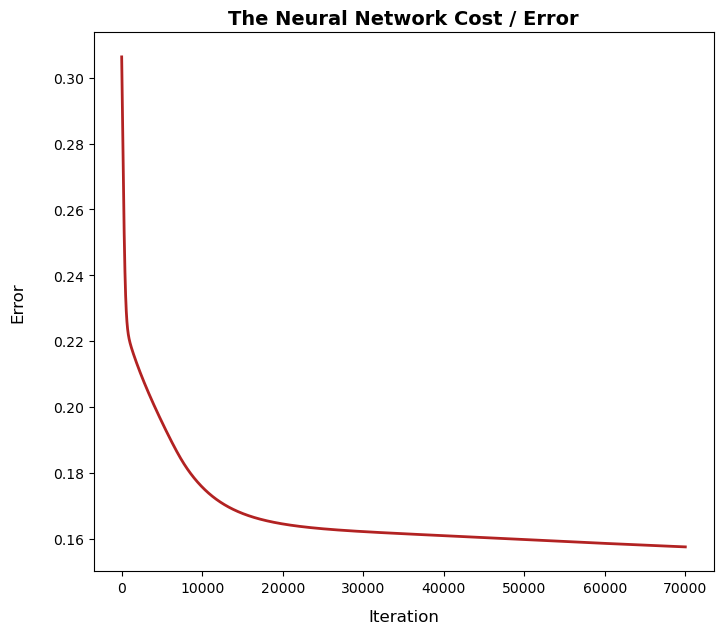

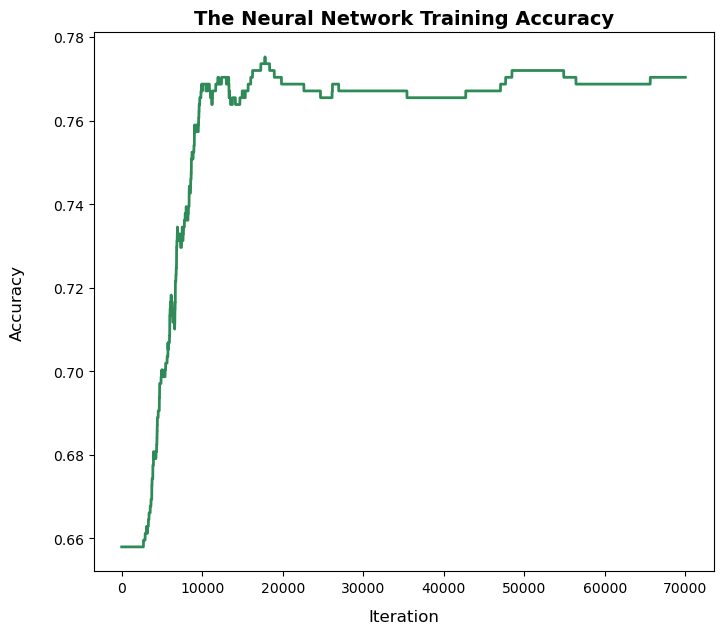

In [11]:
iteration_list = [n for n in range(iterations)]

plt.figure(figsize = (8, 7))
plt.title("The Neural Network Cost / Error", fontsize= 14.0, fontweight='bold')
plt.xlabel("Iteration", labelpad = 10, fontsize= 12.0)
plt.ylabel("Error", labelpad = 20, fontsize= 12.0)
#plt.xticks(np.arange(0, iterations + 2000, step=2000))
plt.plot(iteration_list, NN_errors, linestyle = "-", lw = 2, color = "firebrick")

plt.figure(figsize = (8, 7))
plt.title("The Neural Network Training Accuracy", fontsize= 14.0, fontweight='bold')
plt.xlabel("Iteration", labelpad = 10, fontsize= 12.0)
#plt.xticks(np.arange(0, iterations + 2000, step=2000))
plt.ylabel("Accuracy", labelpad = 20, fontsize= 12.0)
plt.plot(iteration_list, NN_accuracy, linestyle = "-", lw = 2, color = "seagreen")

## Sci-Kit Learn Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 60)

log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)

#weights and bias of neural network:
print("Coefficients: ", log_reg.coef_)
print("Intercept: ", log_reg.intercept_)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Print the Train metrics
print("\nTraining Metrics")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the Test metrics
print("\nTesting Metrics")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

#Train Accuracy:
print("\nTrain Accuracy: ", log_reg.score(X_train, y_train))

y_pred = log_reg.predict(X_test)

# Test Accuracy:
print("\nTest Accuracy: ", log_reg.score(X_test, y_test))

Coefficients:  [[ 1.41857005  2.07104687 -0.49418005  0.49070737 -0.09795486  3.01019895
   0.59780144  1.06643657]]
Intercept:  [-0.63239221]

Training Metrics
Accuracy: 0.7687296416938111
Precision: 0.7329192546583851
Recall: 0.543778801843318
F1 Score: 0.6243386243386243

Testing Metrics
Accuracy: 0.7662337662337663
Precision: 0.6744186046511628
Recall: 0.5686274509803921
F1 Score: 0.6170212765957446

Train Accuracy:  0.7687296416938111

Test Accuracy:  0.7662337662337663


## Sci-Kit Learn Neural Network

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 70)

mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=70000)
#there is one hidden layer here with 5 neurons. And the activation function is sigmoid. The number of iterations = 20000

mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Print the Train metrics
print("Training Metrics")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")


y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the Test metrics
print("\nTesting Metrics")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Training Metrics
Accuracy: 0.7736156351791531
Precision: 0.738255033557047
Recall: 0.5238095238095238
F1 Score: 0.6128133704735377

Testing Metrics
Accuracy: 0.7337662337662337
Precision: 0.7741935483870968
Recall: 0.41379310344827586
F1 Score: 0.5393258426966293


## Question 5: Building Very Large Neural Network

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_normalized and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=70)

# Created a very large Neural Network with 7 hidden layers and 100 neurons in each layer
mlp = MLPClassifier(hidden_layer_sizes=(100, 7), activation='logistic', max_iter=70000)

mlp.fit(X_train, y_train)

# Evaluate the model on the training and test sets
y_train_pred = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Metrics")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTesting Metrics")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Training Metrics
Accuracy: 0.7736156351791531
Precision: 0.6983240223463687
Recall: 0.5952380952380952
F1 Score: 0.6426735218508998

Testing Metrics
Accuracy: 0.7467532467532467
Precision: 0.7567567567567568
Recall: 0.4827586206896552
F1 Score: 0.5894736842105263


Even with a very large Neural Network (7 hidden layers and 100 Neurons within Each hidden layer), the model did not significantly improve its training accuracy